In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df=pd.read_csv("cleaned_dataset.csv")
df.shape

(39237, 15)

# Univariate Analysis

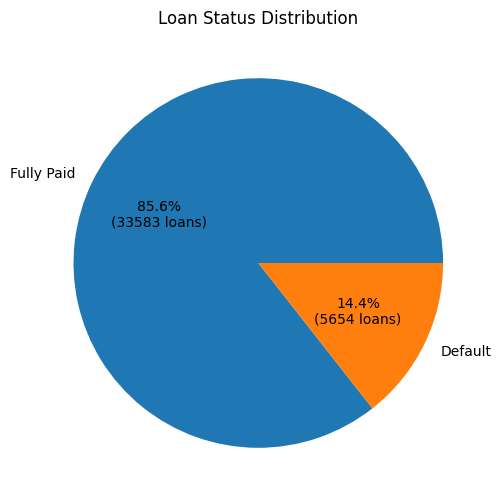

In [3]:
# 1. Number and Percentage of Default Loans

loan_status_counts = df["loan_status"].value_counts()

# Define a function to format the pie chart annotations
def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return "{:.1f}%\n({:d} loans)".format(pct, absolute)

plt.figure(figsize=(6, 6))
plt.pie(
    loan_status_counts, 
    labels=loan_status_counts.index, 
    autopct=lambda pct: func(pct, loan_status_counts),
    
)
plt.title('Loan Status Distribution')
plt.show()

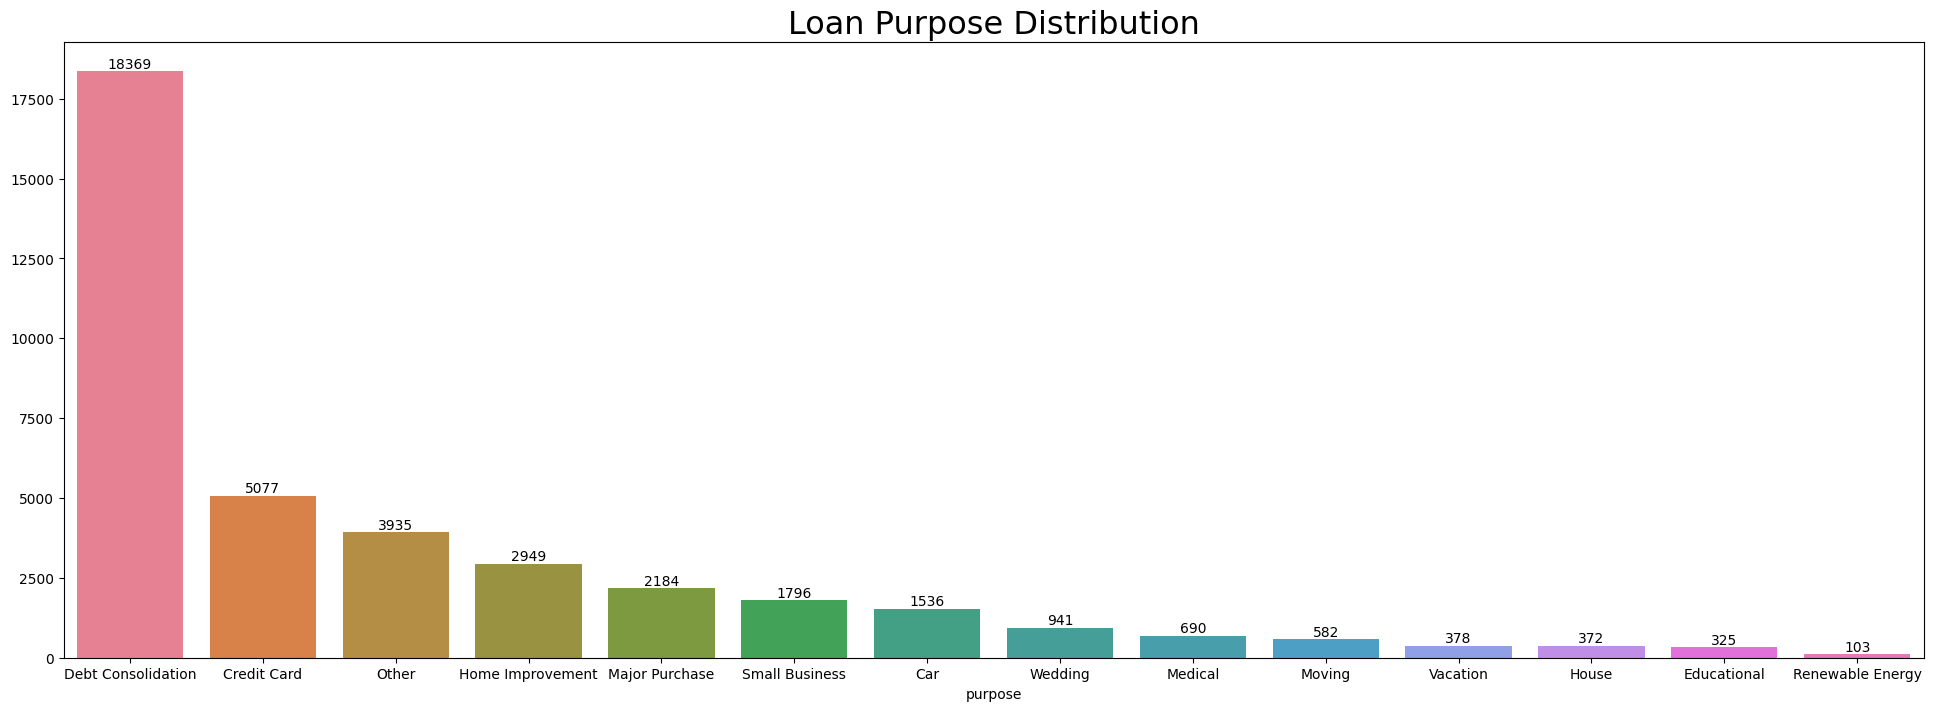

In [4]:
# 2. Majority Loan Purpose
loan_purpose_counts = df["purpose"].value_counts()

plt.figure(figsize=(24,8))
plt.title("Loan Purpose Distribution",fontsize="23")
ax=sns.barplot(x=loan_purpose_counts.index,y=loan_purpose_counts.values,hue=loan_purpose_counts.index)
bars=ax.patches
heights=[bar.get_height() for bar in bars]

#adding annoation on the top of te bar chart
for bar,height in zip(bars,heights):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )
plt.show()

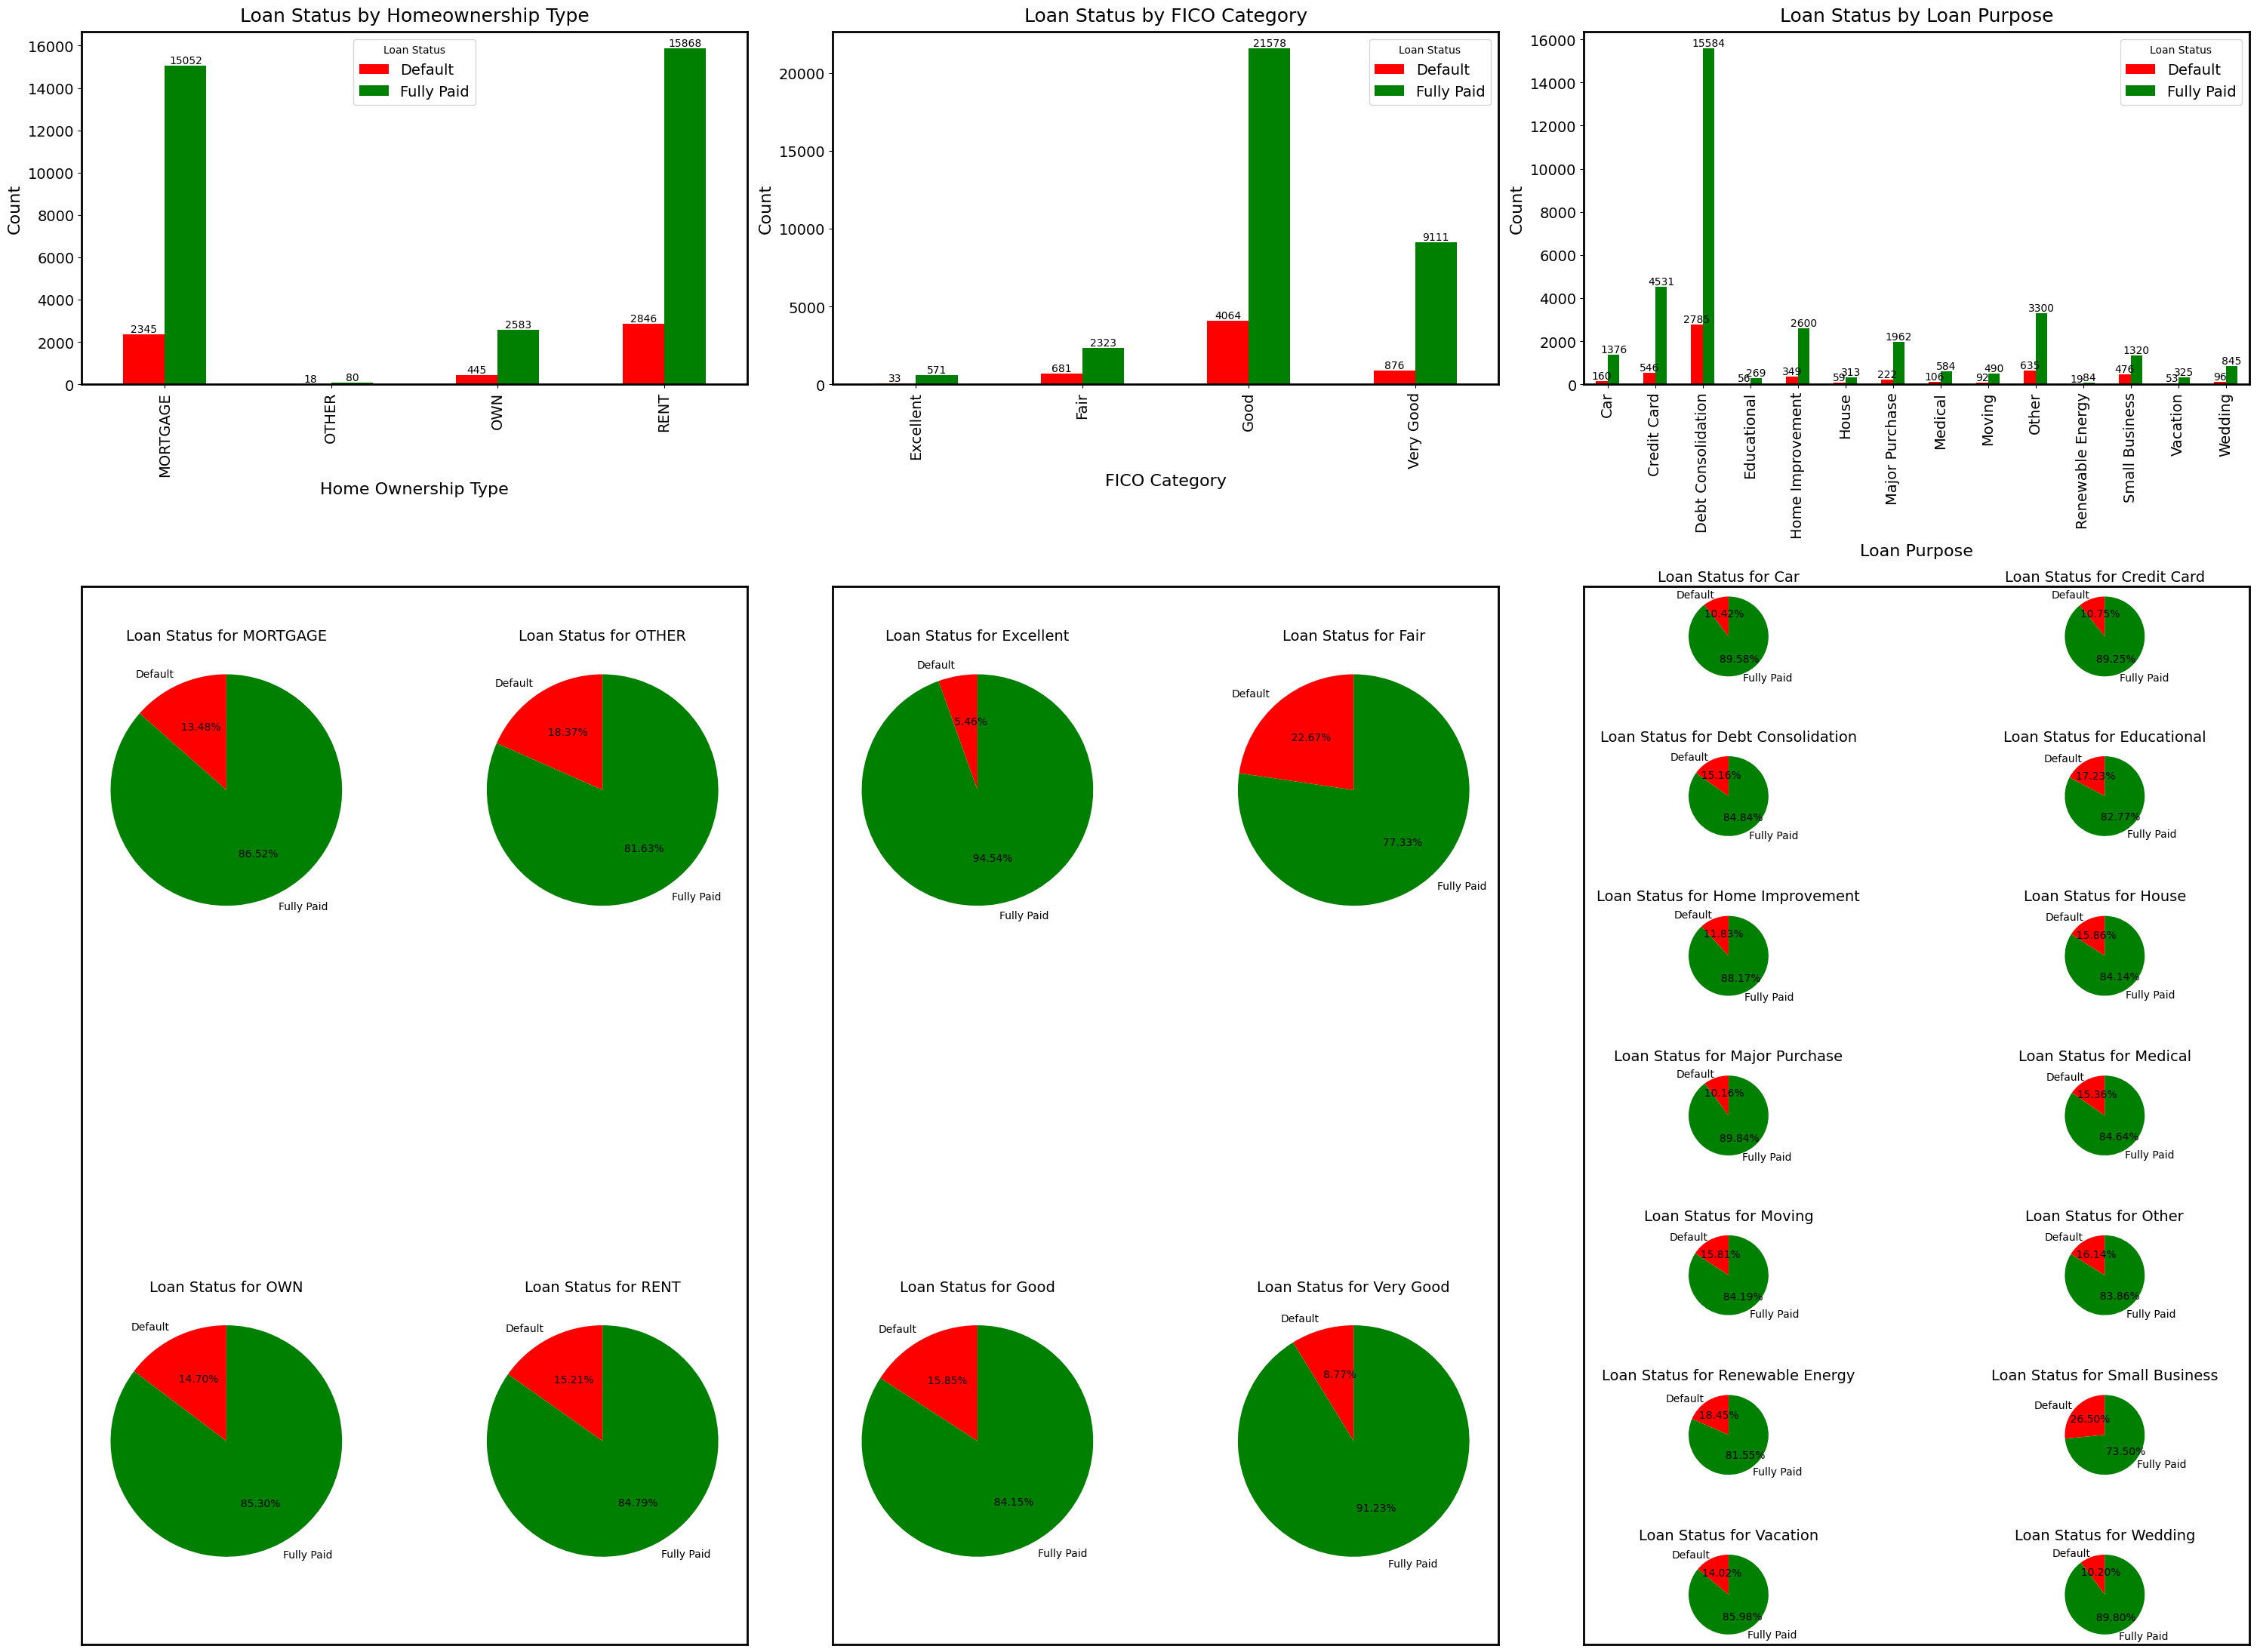

In [54]:
import matplotlib.pyplot as plt

homeownership_counts = df.groupby(["home_ownership", "loan_status"]).size().unstack()
fico_counts = df.groupby(["fico_category", "loan_status"]).size().unstack()
purpose_counts = df.groupby(["purpose", "loan_status"]).size().unstack()

colors = ["red", "green"]
fig = plt.figure(figsize=(30, 22))
grid_spec = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[1, 3])

ax1 = fig.add_subplot(grid_spec[0, 0])
homeownership_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Loan Status by Homeownership Type', fontsize=18, pad=10)
ax1.set_xlabel('Home Ownership Type', fontsize=16, labelpad=5)
ax1.set_ylabel('Count', fontsize=16, labelpad=5)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title='Loan Status', fontsize=14)
ax1.spines[:].set_visible(True)
ax1.spines[:].set_linewidth(2)
for p in ax1.patches:
    ax1.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

ax2 = fig.add_subplot(grid_spec[0, 1])
fico_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Loan Status by FICO Category', fontsize=18, pad=10)
ax2.set_xlabel('FICO Category', fontsize=16, labelpad=5)
ax2.set_ylabel('Count', fontsize=16, labelpad=5)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(title='Loan Status', fontsize=14)
ax2.spines[:].set_visible(True)
ax2.spines[:].set_linewidth(2)
for p in ax2.patches:
    ax2.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )


ax3 = fig.add_subplot(grid_spec[0, 2])
purpose_counts.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Loan Status by Loan Purpose', fontsize=18, pad=10)
ax3.set_xlabel('Loan Purpose', fontsize=16, labelpad=5)
ax3.set_ylabel('Count', fontsize=16, labelpad=5)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.legend(title='Loan Status', fontsize=14)
ax3.spines[:].set_visible(True)
ax3.spines[:].set_linewidth(2)
for p in ax3.patches:
    ax3.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

def create_pie_grid(counts, title, grid_spec, row, col, num_cols=2):
    num_pies = counts.shape[0]
    num_rows = (num_pies + num_cols - 1) // num_cols
    inner_grid = grid_spec[row, col].subgridspec(num_rows, num_cols, wspace=0.3, hspace=0.6)
    container_ax = fig.add_subplot(grid_spec[row, col])
    container_ax.set_frame_on(True)
    container_ax.spines[:].set_visible(True)
    container_ax.spines[:].set_linewidth(2)
    container_ax.set_xticks([])
    container_ax.set_yticks([])
    for i, (category, values) in enumerate(counts.iterrows()):
        ax = fig.add_subplot(inner_grid[i // num_cols, i % num_cols])
        ax.pie(values, labels=values.index, autopct='%7.2f%%', colors=colors, startangle=90)
        
        ax.set_title(f'{title} for {category}', fontsize=14, pad=5)

create_pie_grid(homeownership_counts, 'Loan Status', grid_spec, 1, 0)
create_pie_grid(fico_counts, 'Loan Status', grid_spec, 1, 1)
create_pie_grid(purpose_counts, 'Loan Status', grid_spec, 1, 2)

plt.tight_layout()
plt.show()

